In [1]:
# import libraries

import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import copy
from sklearn.preprocessing import LabelEncoder

In [2]:
# set display settings

warnings.simplefilter(action='ignore', category=RuntimeWarning)
pd.set_option("display.max_rows", None)
pd.set_option('display.max_columns', None)

In [3]:
# specify columns, datatypes, and load full consolidated sdss dataset

# load column names from file into a list
sdss_headers = pd.read_csv('../data/processed/sdss_full.csv.gz', compression='gzip', header=0, index_col=0, nrows=0).columns.tolist()

# specify groups of columns
object_identifiers = ['dr7objid', 'dr8objid', 'specobjid', 'gz2_filenumber']
object_locations = ['ra', 'dec']
object_class_labels = ['sdss_clean_class_name', 'sdss_clean_subclass_name', 'gz2_subclass_name', 'elodie_spectral_type']
object_binary_labels = [label for label in sdss_headers if 'flag' in label]
object_filters = ['score', 'petroR90_r']
object_features = ['redshift_final', 'redshift_noqso', 'redshift_elodie',
                   'u_s', 'g_s', 'r_s', 'i_s', 'z_s',
                   'u_p', 'g_p', 'r_p', 'i_p', 'z_p',
                   'elodie_color_index', 'elodie_temperature', 'elodie_metallicity']

# create a datatype dictionary for object_identifiers
object_dtypes = {col: 'string' for col in object_identifiers}

# load full consolidated sdss dataset
sdss_full = pd.read_csv('../data/processed/sdss_full.csv.gz', compression='gzip', header=0, dtype=object_dtypes)

/tmp/ipykernel_721/3708292460.py:21: DtypeWarning: Columns (10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49) have mixed types. Specify dtype option on import or set low_memory=False.
  sdss_full = pd.read_csv('../data/processed/sdss_full.csv.gz', compression='gzip', header=0, dtype=object_dtypes)


In [4]:
# inspect the imported data
 
 # display some data
display(sdss_full.head(3))
display(sdss_full.tail(3))
display(sdss_full.sample(10))
 
# inspect dataframe
print(sdss_full.shape)
print(sdss_full.info())
for identifier in object_identifiers:
    print(f"\nTop Value Counts:  {sdss_full[identifier].value_counts().nlargest(5)}")

dr7objid             dr8objid           specobjid gz2_filenumber  \
0  588007006336254064  1237651252584448100  693716010653476864         192933   
1  588007006336254083  1237651252584448112  693718759432546304           <NA>   
2  587729226614112406  1237651252584251555  693718209676732416          32264   

           ra        dec sdss_clean_class_name sdss_clean_subclass_name  \
0  236.355530  54.820911                galaxy              STARFORMING   
1  236.342000  54.802830                galaxy             unclassified   
2  235.891464  55.133472                galaxy                      AGN   

  gz2_subclass_name elodie_spectral_type gz1_flag_spiral gz1_flag_elliptical  \
0             SBc2l         unclassified            True               False   
1      unclassified         unclassified           False               False   
2             SBc?t         unclassified            True               False   

  gz1_flag_uncertain gz2_flag_smooth gz2_flag_features_or_disk  \
0              False           False                      True   
1               True             NaN                       NaN   
2              False           False                      True   

  gz2_flag_star_or_artifact gz2_flag_edgeon_yes gz2_flag_edgeon_no  \
0                     False               False               True   
1                       NaN                 NaN                NaN   
2                     False               False               True   

  gz2_flag_bar_yes gz2_flag_bar_no gz2_flag_spiral_yes gz2_flag_spiral_no  \
0             True           False                True              False   
1              NaN             NaN                 NaN                NaN   
2            False           False                True              False   

  gz2_flag_bulge_none1 gz2_flag_bulge_small gz2_flag_bulge_medium  \
0                False                False                 False   
1                  NaN                  NaN                   NaN   
2                False                False                 False   

  gz2_flag_bulge_large gz2_flag_odd_yes gz2_flag_odd_no  \
0                False            False           False   
1                  NaN              NaN             NaN   
2                False            False           False   

  gz2_flag_round_circular gz2_flag_round_medium gz2_flag_round_cigar  \
0                   False                 False                False   
1                     NaN                   NaN                  NaN   
2                   False                 False                False   

  gz2_flag_feature_ring gz2_flag_feature_lens_or_arc  \
0                 False                        False   
1                   NaN                          NaN   
2                 False                        False   

  gz2_flag_feature_disturbed gz2_flag_feature_irregular  \
0                      False                      False   
1                        NaN                        NaN   
2                      False                      False   

  gz2_flag_feature_other gz2_flag_feature_merger gz2_flag_feature_dust_lane  \
0                  False                   False                      False   
1                    NaN                     NaN                        NaN   
2                  False                   False                      False   

  gz2_flag_bulge_round gz2_flag_bulge_boxy gz2_flag_bulge_none2  \
0                 True               False                False   
1                  NaN                 NaN                  NaN   
2                False               False                False   

  gz2_flag_arms_tight gz2_flag_arms_medium gz2_flag_arms_loose  \
0               False                False               False   
1                 NaN                  NaN                 NaN   
2               False                False               False   

  gz2_flag_arms_1 gz2_flag_arms_2 gz2_flag_arms_3 gz2_flag_arms_4  \
0           False         

dr7objid             dr8objid            specobjid gz2_filenumber  \
1654165     <NA>  1237658613593997533  9259471051523641344           <NA>   
1654166     <NA>  1237658613594063054  9259459231773642752           <NA>   
1654167     <NA>  1237658613594063058  9259460331285270528           <NA>   

                ra        dec sdss_clean_class_name sdss_clean_subclass_name  \
1654165  177.50007  50.211641                quasar             unclassified   
1654166  177.79391  50.208232          unclassified             unclassified   
1654167  177.79678  50.375821                quasar                BROADLINE   

        gz2_subclass_name elodie_spectral_type gz1_flag_spiral  \
1654165      unclassified         unclassified             NaN   
1654166      unclassified         unclassified             NaN   
1654167      unclassified         unclassified             NaN   

        gz1_flag_elliptical gz1_flag_uncertain gz2_flag_smooth  \
1654165                 NaN                NaN             NaN   
1654166                 NaN                NaN             NaN   
1654167                 NaN                NaN             NaN   

        gz2_flag_features_or_disk gz2_flag_star_or_artifact  \
1654165                       NaN                       NaN   
1654166                       NaN                       NaN   
1654167                       NaN                       NaN   

        gz2_flag_edgeon_yes gz2_flag_edgeon_no gz2_flag_bar_yes  \
1654165                 NaN                NaN              NaN   
1654166                 NaN                NaN              NaN   
1654167                 NaN                NaN              NaN   

        gz2_flag_bar_no gz2_flag_spiral_yes gz2_flag_spiral_no  \
1654165             NaN                 NaN                NaN   
1654166             NaN                 NaN                NaN   
1654167             NaN                 NaN                NaN   

        gz2_flag_bulge_none1 gz2_flag_bulge_small gz2_flag_bulge_medium  \
1654165                  NaN                  NaN                   NaN   
1654166                  NaN                  NaN                   NaN   
1654167                  NaN                  NaN                   NaN   

        gz2_flag_bulge_large gz2_flag_odd_yes gz2_flag_odd_no  \
1654165                  NaN              NaN             NaN   
1654166                  NaN              NaN             NaN   
1654167                  NaN              NaN             NaN   

        gz2_flag_round_circular gz2_flag_round_medium gz2_flag_round_cigar  \
1654165                     NaN                   NaN                  NaN   
1654166                     NaN                   NaN                  NaN   
1654167                     NaN                   NaN                  NaN   

        gz2_flag_feature_ring gz2_flag_feature_lens_or_arc  \
1654165                   NaN                          NaN   
1654166                   NaN                          NaN   
1654167                   NaN                          NaN   

        gz2_flag_feature_disturbed gz2_flag_feature_irregular  \
1654165                        NaN                        NaN   
1654166                        NaN                        NaN   
1654167                        NaN                        NaN   

        gz2_flag_feature_other gz2_flag_feature_merger  \
1654165                    NaN                     NaN   
1654166                    NaN                     NaN   
1654167                    NaN                     NaN   

        gz2_flag_feature_dust_lane gz2_flag_bulge_round gz2_flag_bulge_boxy  \
1654165                        NaN                  NaN                 NaN   
1654166                        NaN                  NaN                 NaN   
1654167                        NaN                  NaN                 NaN   

        gz2_flag_bulge_none2 gz2_flag_arms_tight gz2_flag_arms_medium  \
1654165                  NaN                 NaN     

dr7objid             dr8objid            specobjid  \
635653   587745970539987230  1237671691764891935  3342933514675841024   
918289                 <NA>  1237661818173391148  6104856169603682304   
425949   587741532789014623  1237667254013919309  2504021522910308352   
1487888                <NA>  1237658800970268980  9242737859760508928   
596944   587742865279352983  1237668586504257696  2795724707159107584   
1383930                <NA>  1237654030325841963  3651380066807554048   
1399635                <NA>  1237651496297562528  4159247791229784064   
1590363                <NA>  1237657857685717328  9255162890994077696   
559689   587727231596822639  1237670957326139494   747751231367178240   
265940   587733196233965642  1237658917458870347  1169864199573104640   

        gz2_filenumber          ra        dec sdss_clean_class_name  \
635653            <NA>  244.838000  18.242140          unclassified   
918289            <NA>  198.393930  13.152804          unclassified   
425949            <NA>  179.930300  29.741330                galaxy   
1487888           <NA>  207.703200  51.917142          unclassified   
596944          184100  163.145981  17.045725                galaxy   
1383930           <NA>  165.272460   2.691661                  star   
1399635           <NA>  125.187810  50.976423                quasar   
1590363           <NA>  187.806200  53.180181          unclassified   
559689            <NA>   26.700580  -8.623694                galaxy   
265940           65377  195.407547  54.390446                galaxy   

        sdss_clean_subclass_name gz2_subclass_name elodie_spectral_type  \
635653              unclassified      unclassified         unclassified   
918289              unclassified      unclassified                    0   
425949               STARFORMING      unclassified         unclassified   
1487888             unclassified      unclassified         unclassified   
596944              unclassified          SBb2m(r)         unclassified   
1383930                       F9      unclassified                 G3IV   
1399635                BROADLINE      unclassified         unclassified   
1590363             unclassified      unclassified             O9.5Vvar   
559689                       AGN      unclassified         unclassified   
265940               STARFORMING              Sc?t         unclassified   

        gz1_flag_spiral gz1_flag_elliptical gz1_flag_uncertain  \
635653            False               False               True   
918289              NaN                 NaN                NaN   
425949            False               False               True   
1487888             NaN                 NaN                NaN   
596944             True               False              False   
1383930             NaN                 NaN                NaN   
1399635             NaN                 NaN                NaN   
1590363             NaN                 NaN                NaN   
559689             True               False              False   
265940             True               False              False   

        gz2_flag_smooth gz2_flag_features_or_disk gz2_flag_star_or_artifact  \
635653              NaN                       NaN                       NaN   
918289              NaN                       NaN                       NaN   
425949              NaN                       NaN                       NaN   
1487888             NaN                       NaN                       NaN   
596944            False                      True                     False   
1383930             NaN                       NaN                       NaN   
1399635             NaN                       NaN                       NaN   
1590363             NaN                       NaN                       NaN   
559689              NaN                       NaN                       NaN   
265940            False                      True                     False   

        gz

(1654168, 68)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1654168 entries, 0 to 1654167
Data columns (total 68 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   dr7objid                      658334 non-null   string 
 1   dr8objid                      1654168 non-null  string 
 2   specobjid                     1654168 non-null  string 
 3   gz2_filenumber                236466 non-null   string 
 4   ra                            1654168 non-null  float64
 5   dec                           1654168 non-null  float64
 6   sdss_clean_class_name         1654168 non-null  object 
 7   sdss_clean_subclass_name      1654168 non-null  object 
 8   gz2_subclass_name             1654168 non-null  object 
 9   elodie_spectral_type          1654168 non-null  object 
 10  gz1_flag_spiral               658334 non-null   object 
 11  gz1_flag_elliptical           658334 non-null   object 
 12  gz1_flag_uncer

Text(0.5, 1.0, 'Distribution of SDSS objects across the sky, by superclass')

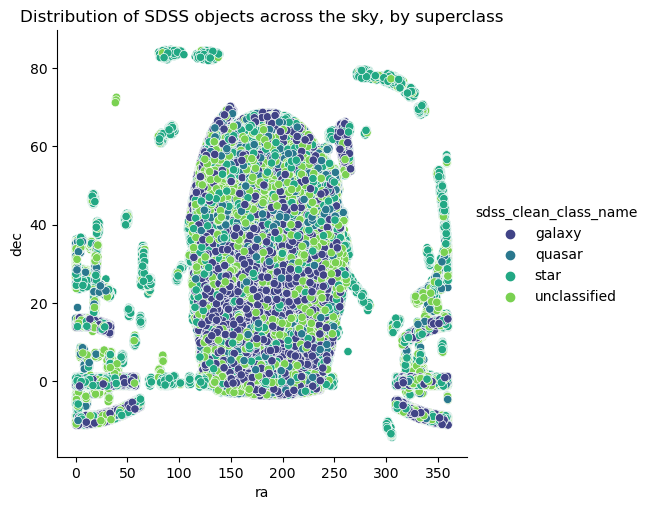

In [5]:
# investigate physical distribution of superclasses

sns.relplot(x='ra', y='dec', hue='sdss_clean_class_name', data=sdss_full.sample(frac=0.2), palette='viridis')
plt.title('Distribution of SDSS objects across the sky, by superclass')

In [ ]:
"""# investigate superclasses & subclasses (categorical labels)

# create a helper function for investigating a column w/ categorical data
def investigate_classes(df, column):
    print(f"\n----------" + label + "----------")
    print(f"\tThe number of rows with empty values is: {df[column].isna().sum()}")
    print(f"\tThe number of unique labels is: {len(df[column].unique())}")
    print(f"\tThe % of the most common labels for column: {100 * df[column].value_counts().head(10) / len(df[column])}")

# summarize label counts for each categorical data column
for label in object_class_labels:
    investigate_classes(sdss_full, label)

# create a helper function to plot the value counts of the top-10 labels for each categorical class
# in a subset of data (based on the sdss_clean_class_name)
def plot_categorical_counts(superclass=None):
    df = sdss_full
    if superclass:
        df = sdss_full[sdss_full['sdss_clean_class_name'] == superclass]
    fig, axes = plt.subplots(nrows=2, ncols=2)
    for i, ax in enumerate(axes.flatten()):
        data = df[object_class_labels[i]]
        sns.countplot(y=data, ax=ax, order=data.value_counts().index[:10], palette='viridis')
        ax.set_title(f"{object_class_labels[i]}")
    plt.suptitle(f"{superclass = }")
    plt.tight_layout()
    plt.show()

# plot the value counts of the top-10 labels for all and each categorical class
for label in [None] + sdss_full['sdss_clean_class_name'].unique().tolist():
    plot_categorical_counts(label)"""

In [6]:
# clean sdss_full table based on gz2 labels

# drop rows that with gz2 labels indicative of stars
sdss_full = sdss_full[sdss_full['gz2_subclass_name'] != 'A']

In [7]:
# label engineering - simplify gz2 labels

# create a mapping dictionary to capture simplified gz2 labels
gz2_map = {
    '.*Er.*': 'Er', # elliptical with low eccentricity (round)
    '.*Ei.*': 'Ee', # elliptical with intermediate eccentricity 
    '.*Ec.*': 'Ec', # elliptical with high eccentricity (cigar-shaped)
    '.*Sa.*': 'Sa', # spiral with large bulge
    '.*Sb.*': 'Sb', # spiral with medium bulge
    '.*Sc.*': 'Sc', # spiral with small bulge
    '.*Sd.*': 'Sd', # spiral with no bulge
    '.*SBa.*': 'SBa', # barred-spiral with large bulge
    '.*SBb.*': 'SBb', # barred-spiral with medium bulge
    '.*SBc.*': 'SBc', # barred-spiral with small bulge
    '.*SBd.*': 'SBd', # barred-spiral with no bulge
    '.*Ser.*': 'Er', # edge-on spiral with round bulge
    '.*Seb.*': 'Er', # edge-on spiral with boxy bulge
    '.*Sen.*': 'Er', # edge-on spiral with no bulge
}

# add a new column with simplified gz2 labels and insert it as the 10th column
sdss_full['gz2_subclass_hubble'] = sdss_full['gz2_subclass_name'].replace(gz2_map, regex=True)
sdss_full.insert(9, 'gz2_subclass_hubble', sdss_full.pop('gz2_subclass_hubble'))

print(sdss_full[sdss_full['sdss_clean_class_name'] == 'galaxy']['gz2_subclass_hubble'].value_counts())

gz2_subclass_hubble
unclassified    331350
Er               58983
Ee               46752
Sc               43848
Sb               27711
SBc              25686
SBb              17991
Ec               10378
Sd                2981
SBd                901
Sa                 527
SBa                146
Name: count, dtype: int64


In [8]:
# label engineering - simplify star labels

# create mapping dictionaries to capture simplified star labels
stellar_MK_class_map = {
    '.*O.*': 'O', # blue
    '.*B.*': 'B', # bluish white
    '.*A.*': 'A', # white
    '.*F.*': 'F', # yellowish white
    '.*G.*': 'G', # yellow
    '.*K.*': 'K', # light orange
    '.*M.*': 'M', # orangeish red
    '.*D.*': 'D', # white dwarf
    '.*WD.*': 'D', # white dwarf
    '.*S.*': 'C', # carbon star
    '.*C.*': 'C', # carbon star
    '.*L.*': 'd', # cool (red or brown) dwarf
    '.*T.*': 'd', # cool (red or brown) dwarf 
    '.*Y.*': 'd', # cool (red or brown) dwarf
}

# add a new column with simplified MK labels (based on SDSS subclass) and insert it as the 9th column
sdss_full['sdss_subclass_MK'] = sdss_full['sdss_clean_subclass_name'].replace(stellar_MK_class_map, regex=True)
sdss_full.insert(8, 'sdss_subclass_MK', sdss_full.pop('sdss_subclass_MK'))

# add a new column with simplified MK labels (based on elodie subclass) and insert it as the 12th column
sdss_full['elodie_subclass_MK'] = sdss_full['elodie_spectral_type'].replace(stellar_MK_class_map, regex=True)
sdss_full.insert(12, 'elodie_subclass_MK', sdss_full.pop('elodie_subclass_MK'))

# add a new column with simplified MK labels (based on both SDSS and elodie) and insert it as the 7th column
sdss_full['stellar_subclass_MK'] = sdss_full.apply(lambda row: row['sdss_subclass_MK'] \
    if row['sdss_subclass_MK'] == row['elodie_subclass_MK'] else 'unclassified', axis=1)
sdss_full.insert(7, 'stellar_subclass_MK', sdss_full.pop('stellar_subclass_MK'))

print(sdss_full[sdss_full['sdss_clean_class_name'] == 'star']['stellar_subclass_MK'].value_counts())
print(sdss_full[sdss_full['sdss_clean_class_name'] == 'star']['sdss_subclass_MK'].value_counts())
print(sdss_full[sdss_full['sdss_clean_class_name'] == 'star']['elodie_subclass_MK'].value_counts())

stellar_subclass_MK
unclassified    276326
K                50694
M                43023
G                15508
F                14849
A                 3282
B                  243
O                  199
C                    6
Name: count, dtype: int64
sdss_subclass_MK
F    164917
M     82615
K     67727
A     36580
G     34890
D     10306
d      2212
C      2101
O      1461
B      1321
Name: count, dtype: int64
elodie_subclass_MK
G          88492
unknown    77214
M          70119
K          69718
F          53207
O          27986
0           8809
A           6496
B           1966
C            123
Name: count, dtype: int64


In [ ]:
"""# investigate filters and features

for col in object_filters + object_features:
    print(f"{len(sdss_full[sdss_full[col] <= 0])} negative values")
    print(sdss_full[col].describe())
    plt.figure(figsize=(2, 1))
    plt.hist(x=sdss_full[col], bins=50)
    plt.title(col)
    plt.show()"""

In [9]:
# remove bad rows to geenrate a cleaned table

# create a new dataframe to store essential information
sdss_primary = copy.deepcopy(sdss_full)

# drop rows that have non-physical photometric values
sdss_primary = sdss_primary[sdss_primary['u_p'] >= 0]
sdss_primary = sdss_primary[sdss_primary['g_p'] >= 0]
sdss_primary = sdss_primary[sdss_primary['r_p'] >= 0]
sdss_primary = sdss_primary[sdss_primary['i_p'] >= 0]
sdss_primary = sdss_primary[sdss_primary['z_p'] >= 0]

# drop rows with photometric scores less than 0.8
sdss_primary = sdss_primary[sdss_primary['score'] >= 0.8]

# drop rows with impossible petrosian radii
sdss_primary = sdss_primary[~(sdss_primary['petroR90_r'] < 0)]

"""# create a helper function to remove tukey outliers (based on interquartile range)
def remove_outlier_rows(df, columns):
    for column in columns:        
        q1 = df[column].quantile(0.25)
        q3 = df[column].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# drop tukey outliers
sdss_primary = remove_outlier_rows(sdss_primary, object_filters + object_features)"""

'# create a helper function to remove tukey outliers (based on interquartile range)\ndef remove_outlier_rows(df, columns):\n    for column in columns:        \n        q1 = df[column].quantile(0.25)\n        q3 = df[column].quantile(0.75)\n        iqr = q3 - q1\n        lower_bound = q1 - 1.5 * iqr\n        upper_bound = q3 + 1.5 * iqr\n        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]\n    return df\n\n# drop tukey outliers\nsdss_primary = remove_outlier_rows(sdss_primary, object_filters + object_features)'


---------- sdss_clean_class_name : None ----------
The number of rows with classified values is: 1089273
The number of rows with unclassified values is: 442167
The number of unique labels is: 4


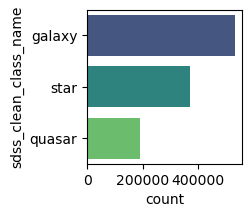


---------- gz2_subclass_hubble : galaxy ----------
The number of rows with classified values is: 222372
The number of rows with unclassified values is: 308727
The number of unique labels is: 12


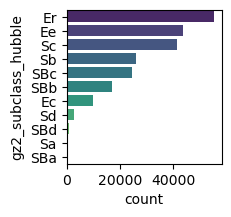


---------- stellar_subclass_MK : star ----------
The number of rows with classified values is: 117478
The number of rows with unclassified values is: 251143
The number of unique labels is: 9


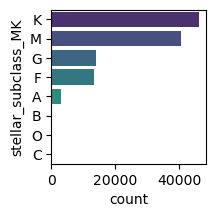

In [10]:
# investigate superclasses & simplified subclasses (categorical labels)

# create a helper function for investigating and plotting a subset from a column w/ categorical data
def investigate_clean_classes(df, column, filter=None):
    data = df[column]
    if filter:
        data = df[df['sdss_clean_class_name'] == filter][column]
    unclassified_count = data.isna().sum() + (data == 'unclassified').sum() + (data == 'unkonwn').sum()
    print(f"\n---------- {column} : {filter} ----------")
    print(f"The number of rows with classified values is: {len(data) - unclassified_count}")
    print(f"The number of rows with unclassified values is: {unclassified_count}")
    print(f"The number of unique labels is: {len(df[column].unique())}")
    data2 = data[data != 'unclassified']
    data2 = data2[data2 != 'unknown']
    plt.figure(figsize=(2, 2))
    sns.countplot(y=data2, order=data2.value_counts().index[:15], palette='viridis')
    #plt.suptitle(f"{column = }")
    #plt.tight_layout()
    plt.show()

investigate_clean_classes(sdss_primary, 'sdss_clean_class_name')
investigate_clean_classes(sdss_primary, 'gz2_subclass_hubble', 'galaxy')
investigate_clean_classes(sdss_primary, 'stellar_subclass_MK', 'star')

In [11]:
# label encoding - convert categorical labels to numerical labels

# add a new column for object_class_code
le = LabelEncoder()
sdss_primary['sdss_clean_class_code0'] = le.fit_transform(sdss_primary['sdss_clean_class_name'])
sdss_primary.insert(loc=sdss_primary.columns.get_loc('sdss_clean_class_name')+1, column='sdss_clean_class_code', value=sdss_primary['sdss_clean_class_code0'])
sdss_primary = sdss_primary.drop('sdss_clean_class_code0', axis=1)
sdss_clean_class_map = {a:i for i,a in enumerate(le.classes_)}
print(f"\nMapping for sdss_clean_class: \n{sdss_clean_class_map}")

# add a new column for star_class_code
le = LabelEncoder()
sdss_primary['stellar_subclass_code0'] = le.fit_transform(sdss_primary['stellar_subclass_MK'])
sdss_primary.insert(loc=sdss_primary.columns.get_loc('stellar_subclass_MK')+1, column='stellar_subclass_code', value=sdss_primary['stellar_subclass_code0'])
sdss_primary = sdss_primary.drop('stellar_subclass_code0', axis=1)
sdss_clean_class_map = {a:i for i,a in enumerate(le.classes_)}
print(f"\nMapping for stellar_subclass: \n{sdss_clean_class_map}")

# add a new column for galaxy_class_code
le = LabelEncoder()
sdss_primary['gz2_subclass_code0'] = le.fit_transform(sdss_primary['gz2_subclass_hubble'])
sdss_primary.insert(loc=sdss_primary.columns.get_loc('gz2_subclass_hubble')+1, column='gz2_subclass_code', value=sdss_primary['gz2_subclass_code0'])
sdss_primary = sdss_primary.drop('gz2_subclass_code0', axis=1)
sdss_clean_class_map = {a:i for i,a in enumerate(le.classes_)}
print(f"\nMapping for gz2_subclass: \n{sdss_clean_class_map}")


Mapping for sdss_clean_class: 
{'galaxy': 0, 'quasar': 1, 'star': 2, 'unclassified': 3}

Mapping for stellar_subclass: 
{'A': 0, 'B': 1, 'C': 2, 'F': 3, 'G': 4, 'K': 5, 'M': 6, 'O': 7, 'unclassified': 8}

Mapping for gz2_subclass: 
{'Ec': 0, 'Ee': 1, 'Er': 2, 'SBa': 3, 'SBb': 4, 'SBc': 5, 'SBd': 6, 'Sa': 7, 'Sb': 8, 'Sc': 9, 'Sd': 10, 'unclassified': 11}


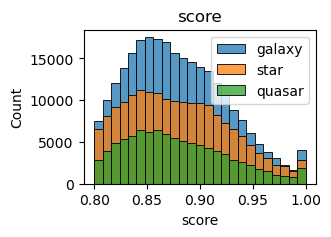

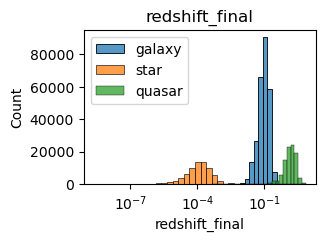

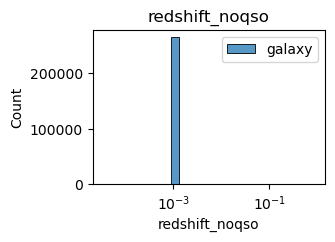

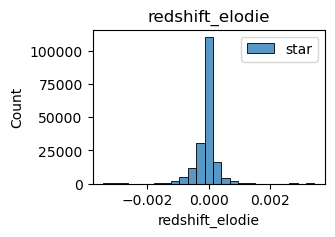

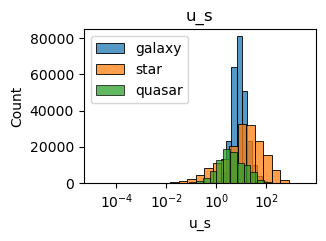

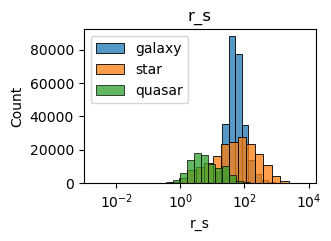

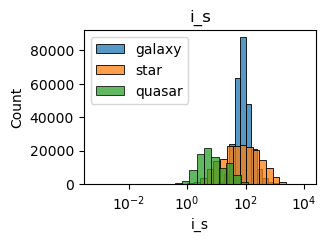

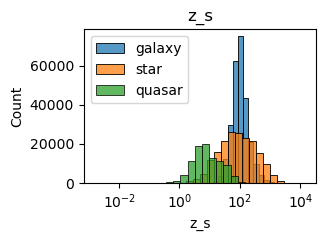

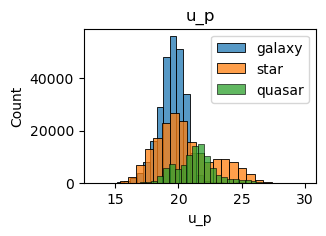

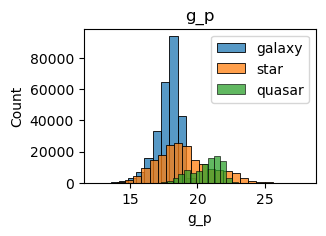

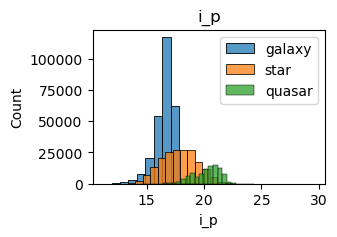

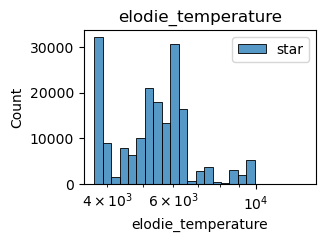

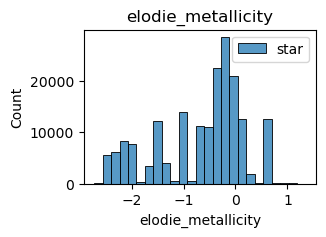

In [12]:
# investigate histograms of feature columns, color-shaded by superclass

# generate a subset dataframe
df = sdss_primary[['sdss_clean_class_name'] + object_filters + object_features]
df = df.sample(frac=0.5)

# define classes
classes = sdss_primary['sdss_clean_class_name'].unique()
classes = classes[classes != 'unclassified']

# set a color palette with distinct colors for each category
colors = sns.color_palette('bright', n_colors=len(df['sdss_clean_class_name'].unique()))

# iterate over columns and create separate plots
for col in object_filters + object_features:
    plt.figure(figsize=(3, 2))
    plt.xscale('linear')
    log_choice = False
    denom = df[col].min()
    if denom == 0:
        denom = 0.001
    if abs(df[col].max() / denom) > 50:
        df[col] = df[col].replace(0, 0.001)
        log_choice = True
        plt.xscale('symlog')  
    for class_label, color in zip(classes, colors):
        if ('petro' in col) | ('noqso' in col):
            if class_label == 'galaxy':
                sns.histplot(df[df['sdss_clean_class_name'] == class_label][col], bins=25, label=class_label, log_scale=log_choice)
        elif 'elodie' in col:
            if class_label == 'star':
                sns.histplot(df[df['sdss_clean_class_name'] == class_label][col], bins=25, label=class_label, log_scale=log_choice)
        else:
            sns.histplot(df[df['sdss_clean_class_name'] == class_label][col], bins=25, label=class_label, log_scale=log_choice)
    plt.title(col)
    plt.legend()
    plt.show()

In [13]:
# feature engineering - create a new feature based on the log-transform

# create new feature for log of redshift_final
sdss_primary['redshift_log0'] = np.log(sdss_primary['redshift_final'] - 2 * sdss_primary['redshift_final'].min())
sdss_primary.insert(loc=sdss_primary.columns.get_loc('redshift_final')+1, column='redshift_log', value=sdss_primary['redshift_log0'])
sdss_primary = sdss_primary.drop('redshift_log0', axis=1)

# create new feature for log of petrosian radius
sdss_primary['petroR90_r_log0'] = np.log(sdss_primary['petroR90_r'] - 2 * sdss_primary['petroR90_r'].min())
sdss_primary.insert(loc=sdss_primary.columns.get_loc('petroR90_r')+1, column='petroR90_r_log', value=sdss_primary['petroR90_r_log0'])
sdss_primary = sdss_primary.drop('petroR90_r_log0', axis=1)

In [14]:
# feature engineering - create new features based on the sum and differences of photometric features

# define list of original photmetric features
features = ['u_p','g_p','r_p','i_p','z_p']

# create a new column 'p_sum'
sdss_primary['sum_p'] = sdss_primary[features].sum(axis=1)

# extract column names without the common suffix
col_list = [col.replace('_p', '') for col in features]

# generate new columns based on subtractions for the desired combinations
for i in range(len(col_list)):
    for j in range(i + 1, len(col_list)):
        col1 = col_list[i]
        col2 = col_list[j]
        new_col_name = f"{col1}-{col2}_p"
        sdss_primary[new_col_name] = sdss_primary[f"{col1}_p"] - sdss_primary[f"{col2}_p"]

# display some data
display(sdss_primary.sample(5))

dr7objid             dr8objid            specobjid  \
444743   587742576446406738  1237668297671311409  2944246748425512960   
1069809                <NA>  1237663918421508231  2114544828594284544   
904973                 <NA>  1237663204917313928  8856559682141310976   
790173                 <NA>  1237661418745037028  9247030645817102336   
493359   587742060530827402  1237667781755732112  2814800689614579712   

        gz2_filenumber          ra        dec sdss_clean_class_name  \
444743            <NA>  194.889500  19.419080                galaxy   
1069809           <NA>  140.841380  67.617152          unclassified   
904973            <NA>    7.161951   0.712157                quasar   
790173            <NA>  196.213210  57.852683                quasar   
493359            <NA>  172.132900  21.179470                galaxy   

         sdss_clean_class_code stellar_subclass_MK  stellar_subclass_code  \
444743                       0        unclassified                      8   
1069809                      3        unclassified                      8   
904973                       1        unclassified                      8   
790173                       1        unclassified                      8   
493359                       0        unclassified                      8   

        sdss_clean_subclass_name sdss_subclass_MK gz2_subclass_name  \
444743              unclassified     unclassified      unclassified   
1069809             unclassified     unclassified      unclassified   
904973                 BROADLINE                O      unclassified   
790173                 BROADLINE                O      unclassified   
493359              unclassified     unclassified      unclassified   

        gz2_subclass_hubble  gz2_subclass_code elodie_spectral_type  \
444743         unclassified                 11         unclassified   
1069809        unclassified                 11                  K7V   
904973         unclassified                 11         unclassified   
790173         unclassified                 11         unclassified   
493359         unclassified                 11         unclassified   

        elodie_subclass_MK gz1_flag_spiral gz1_flag_elliptical  \
444743        unclassified           False               False   
1069809                  K             NaN                 NaN   
904973        unclassified             NaN                 NaN   
790173        unclassified             NaN                 NaN   
493359        unclassified           False               False   

        gz1_flag_uncertain gz2_flag_smooth gz2_flag_features_or_disk  \
444743                True             NaN                       NaN   
1069809                NaN             NaN                       NaN   
904973                 NaN             NaN                       NaN   
790173                 NaN             NaN                       NaN   
493359                True             NaN                       NaN   

        gz2_flag_star_or_artifact gz2_flag_edgeon_yes gz2_flag_edgeon_no  \
444743                        NaN                 NaN                NaN   
1069809                       NaN                 NaN                NaN   
904973                        NaN                 NaN                NaN   
790173                        NaN                 NaN                NaN   
493359                        NaN                 NaN                NaN   

        gz2_flag_bar_yes gz2_flag_bar_no gz2_flag_spiral_yes  \
444743               NaN             NaN                 NaN   
1069809              NaN             NaN                 NaN   
904973               NaN             NaN                 NaN   
790173               NaN             NaN                 NaN   
493359               NaN             NaN                 NaN   

        gz2_flag_spiral_no gz2_flag_bulge_none1 gz2_flag_bulge_small  \
444743                 NaN                  NaN                  NaN   
1069809             

<Axes: >

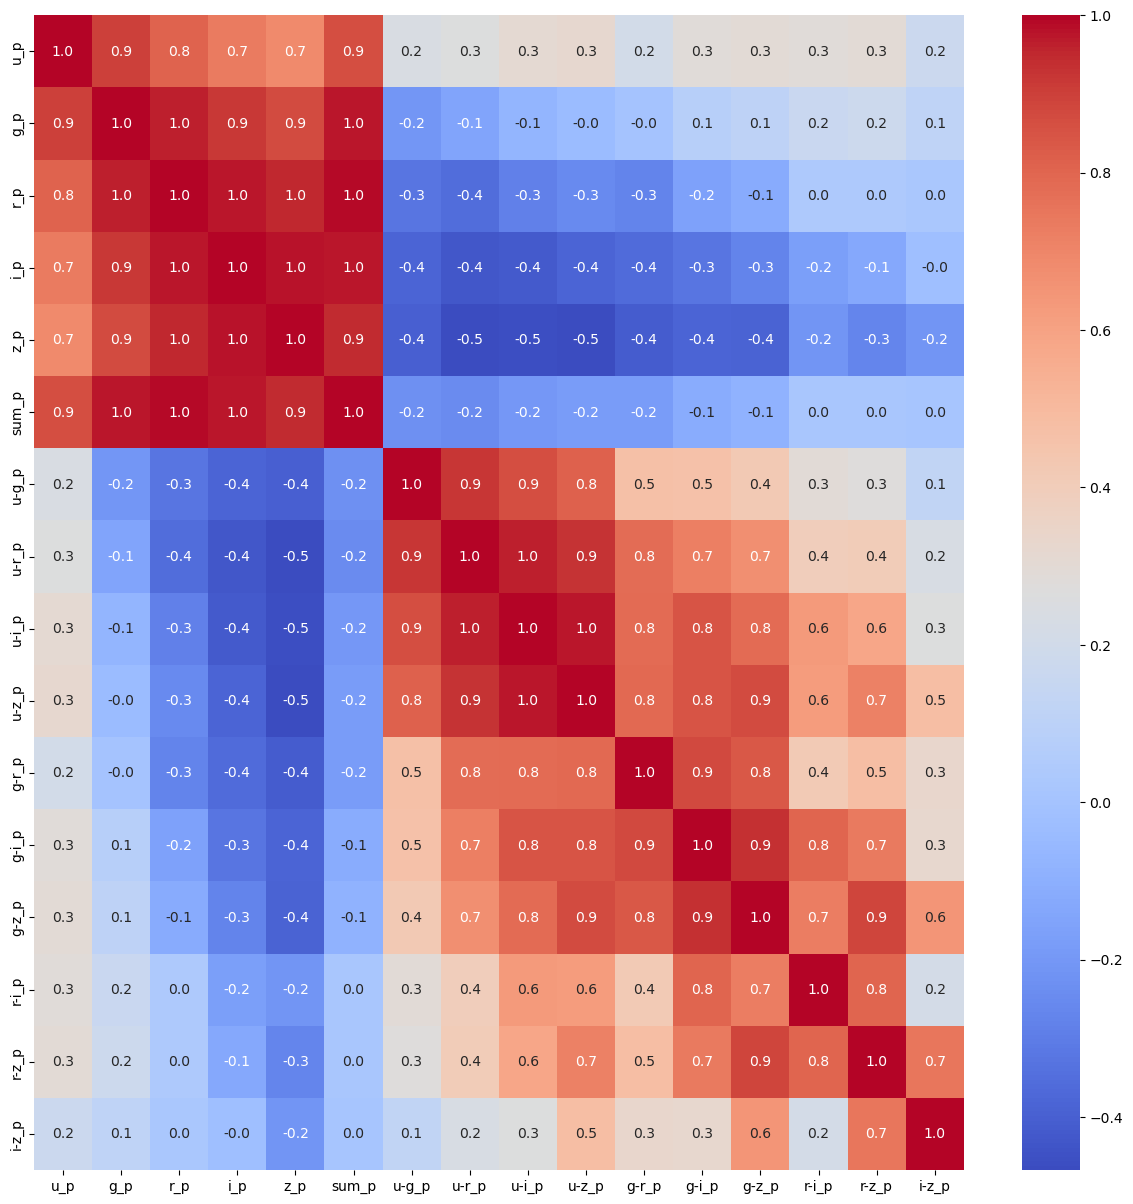

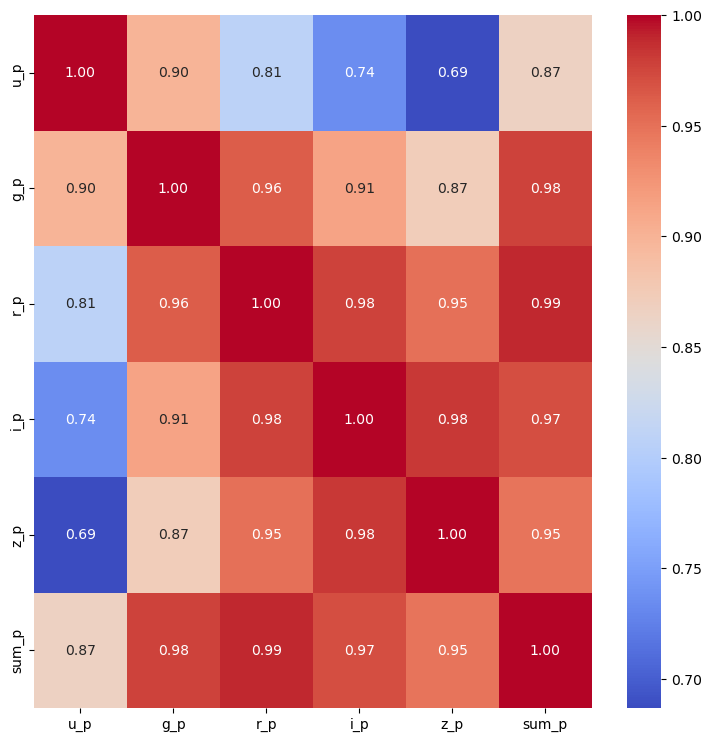

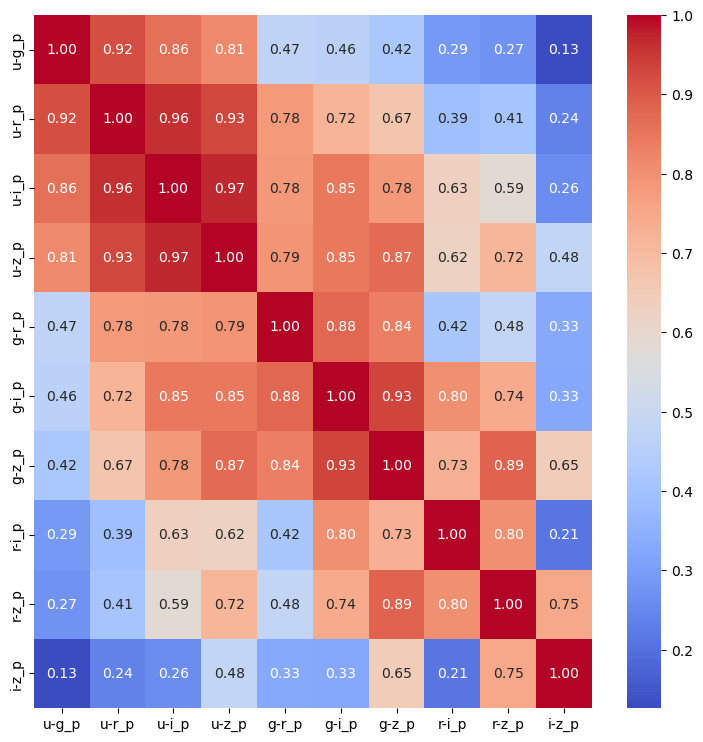

In [15]:
# investigate correlations amongst photmetric filter model magnitudes

# investigate all photometric features
features = ['u_p','g_p','r_p','i_p','z_p','sum_p','u-g_p','u-r_p','u-i_p','u-z_p','g-r_p','g-i_p','g-z_p','r-i_p','r-z_p','i-z_p']
p_correlations = sdss_primary[features].corr()
plt.figure(figsize=(15, 15))
sns.heatmap(p_correlations, annot=True, cmap='coolwarm', fmt='.1f')

# investigate original and summ photmetric features
features = ['u_p','g_p','r_p','i_p','z_p','sum_p']
p_correlations = sdss_primary[features].corr()
plt.figure(figsize=(9, 9))
sns.heatmap(p_correlations, annot=True, cmap='coolwarm', fmt='.2f')

# investigate difference photometric features
features = ['u-g_p','u-r_p','u-i_p','u-z_p','g-r_p','g-i_p','g-z_p','r-i_p','r-z_p','i-z_p']
p_correlations = sdss_primary[features].corr()
plt.figure(figsize=(9, 9))
sns.heatmap(p_correlations, annot=True, cmap='coolwarm', fmt='.2f')

<Figure size 1000x1000 with 0 Axes>

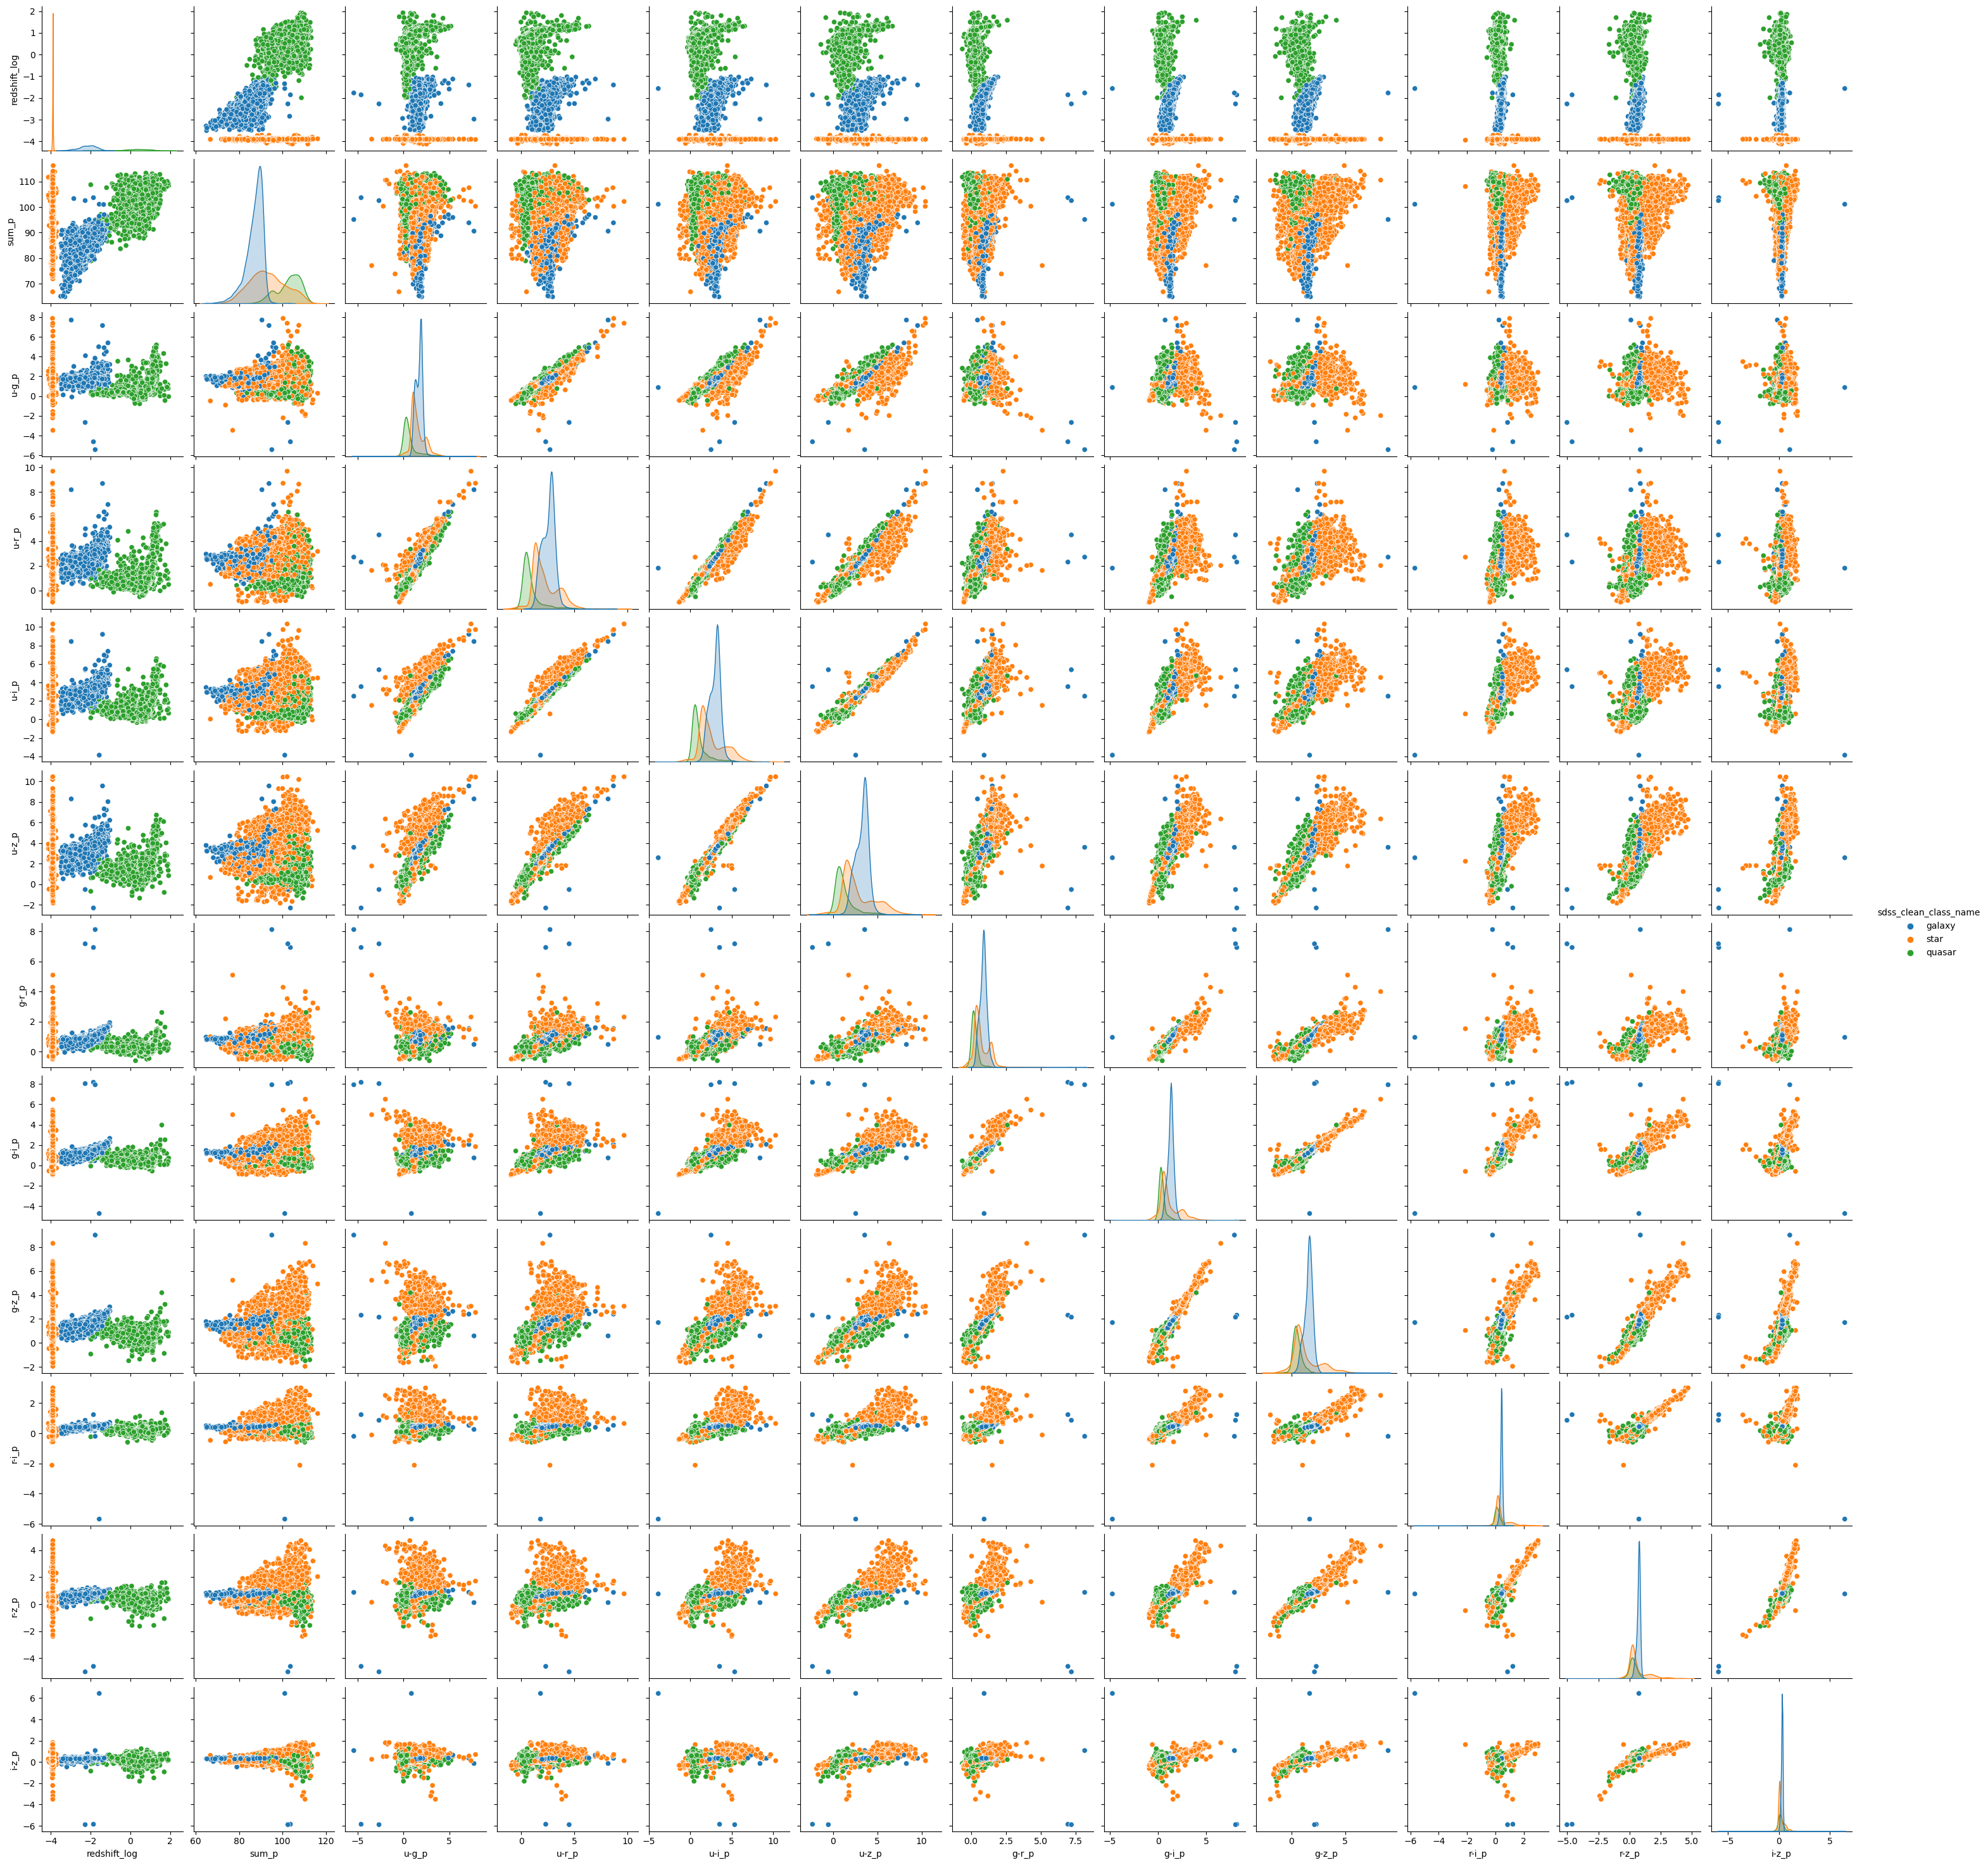

In [17]:
# investigate pairplots of engineered features

# create a dataframe based on relevant subset of features
features = ['redshift_log', 'sum_p','u-g_p','u-r_p','u-i_p','u-z_p','g-r_p','g-i_p','g-z_p','r-i_p','r-z_p','i-z_p']
df = sdss_primary[['sdss_clean_class_name'] + features]
df = df[df['sdss_clean_class_name'] != 'unclassified']

# generate the pairplot
plt.figure(figsize=(10, 10))
sns.pairplot(df.sample(frac=0.01), hue='sdss_clean_class_name')


In [ ]:
# feature importance ranking using gini or iformation gain

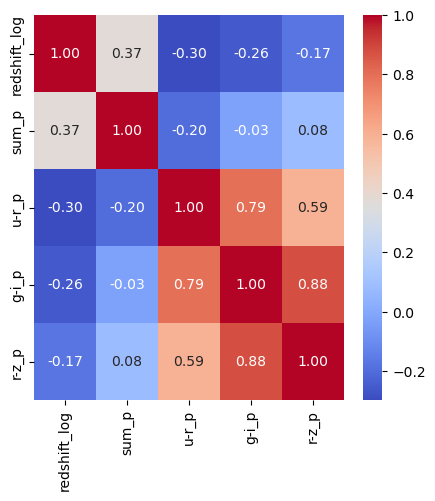

<Figure size 1000x1000 with 0 Axes>

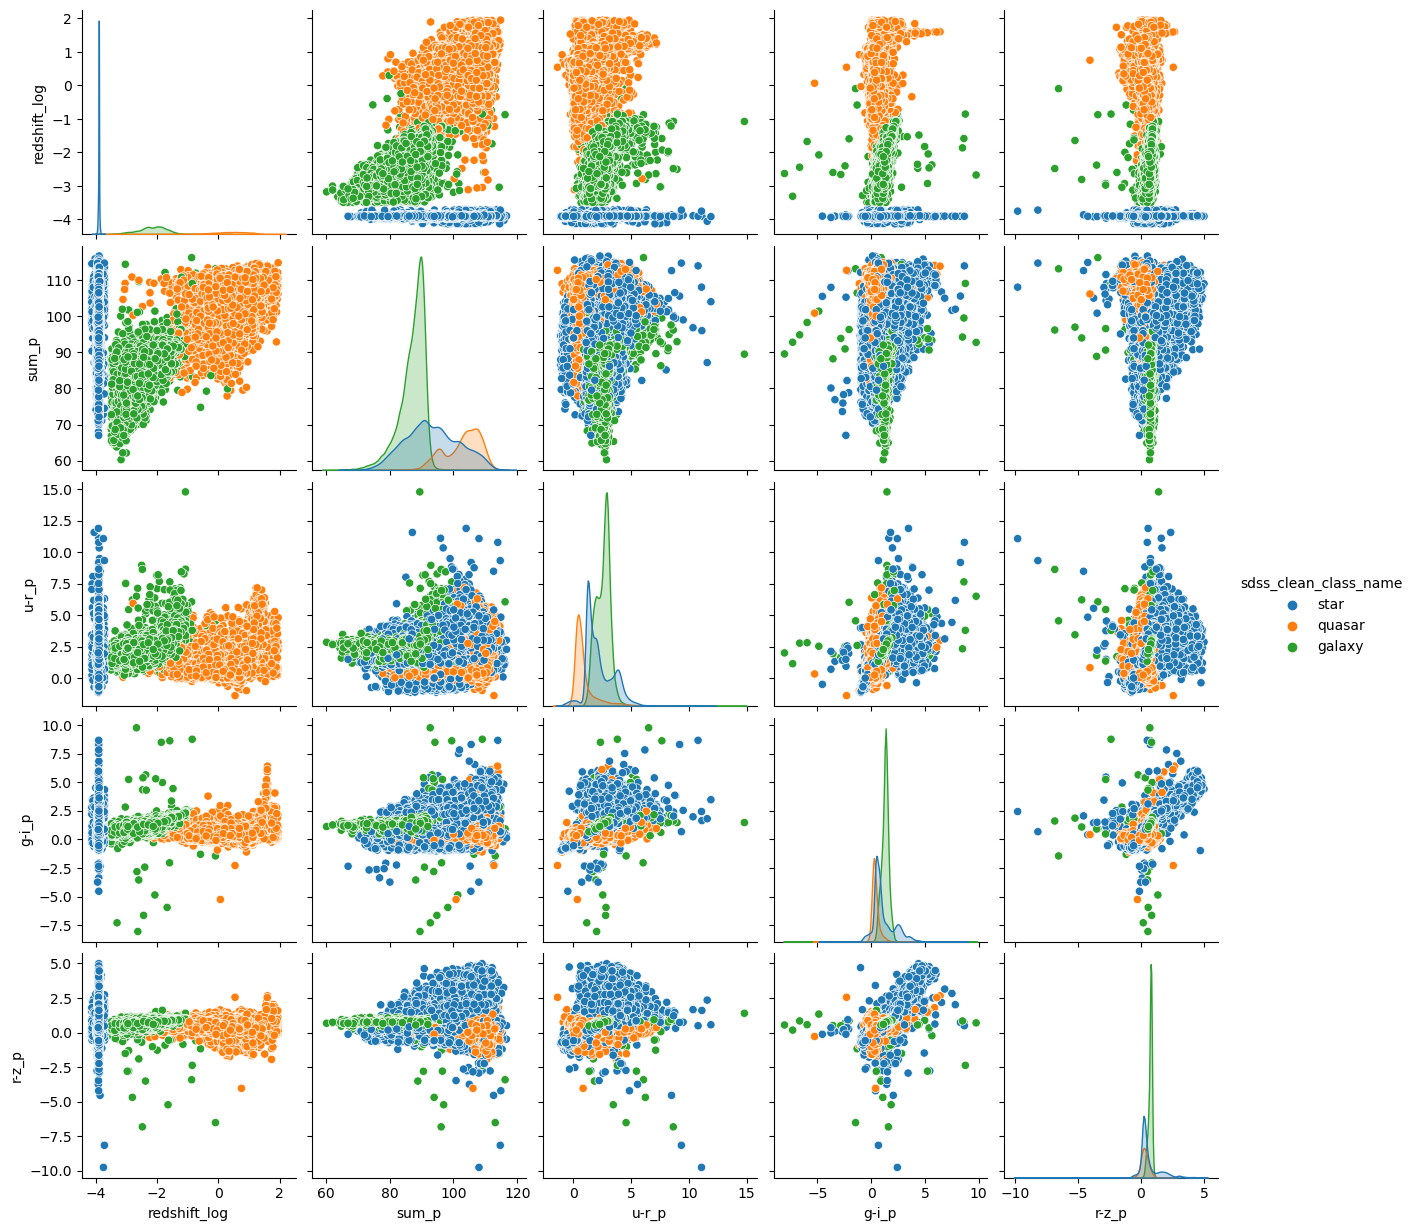

In [19]:
# investigate selected photometric features for superclass

# NOTE: these features are selected based on physical (common-sense) reasons and validated based on correlations
features = ['redshift_log', 'sum_p', 'u-r_p', 'g-i_p', 'r-z_p']

# create a dataframe based on relevant subset of features
df = sdss_primary[['sdss_clean_class_name'] + features]
df = df[df['sdss_clean_class_name'] != 'unclassified']

# generate correlation plot
p_correlations = df[features].corr()
plt.figure(figsize=(5, 5))
sns.heatmap(p_correlations, annot=True, cmap='coolwarm', fmt='.2f')

# generate the pairplot
plt.figure(figsize=(10, 10))
sns.pairplot(df.sample(frac=0.1), hue='sdss_clean_class_name')

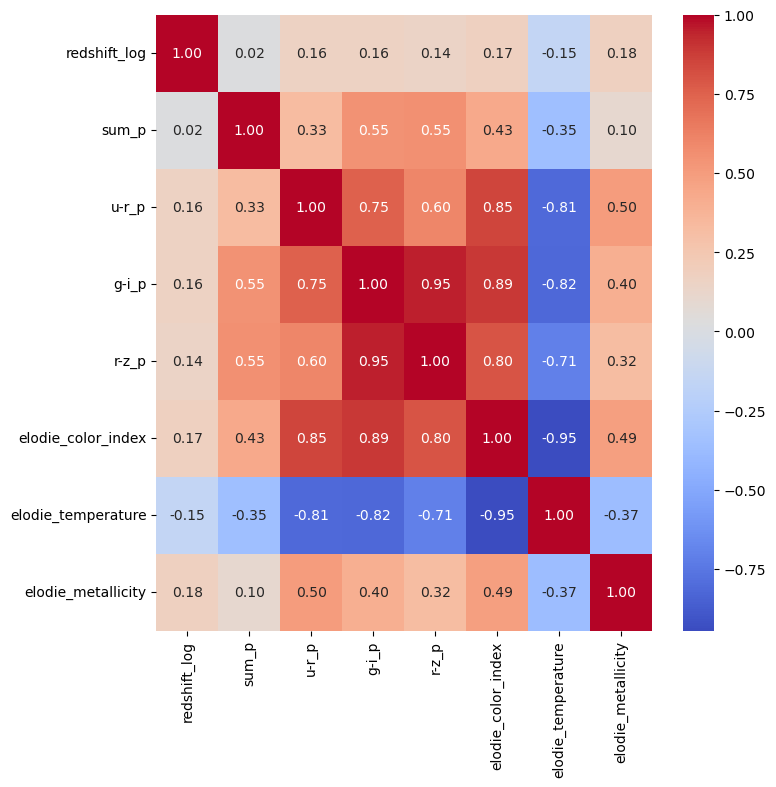

<Figure size 1000x1000 with 0 Axes>

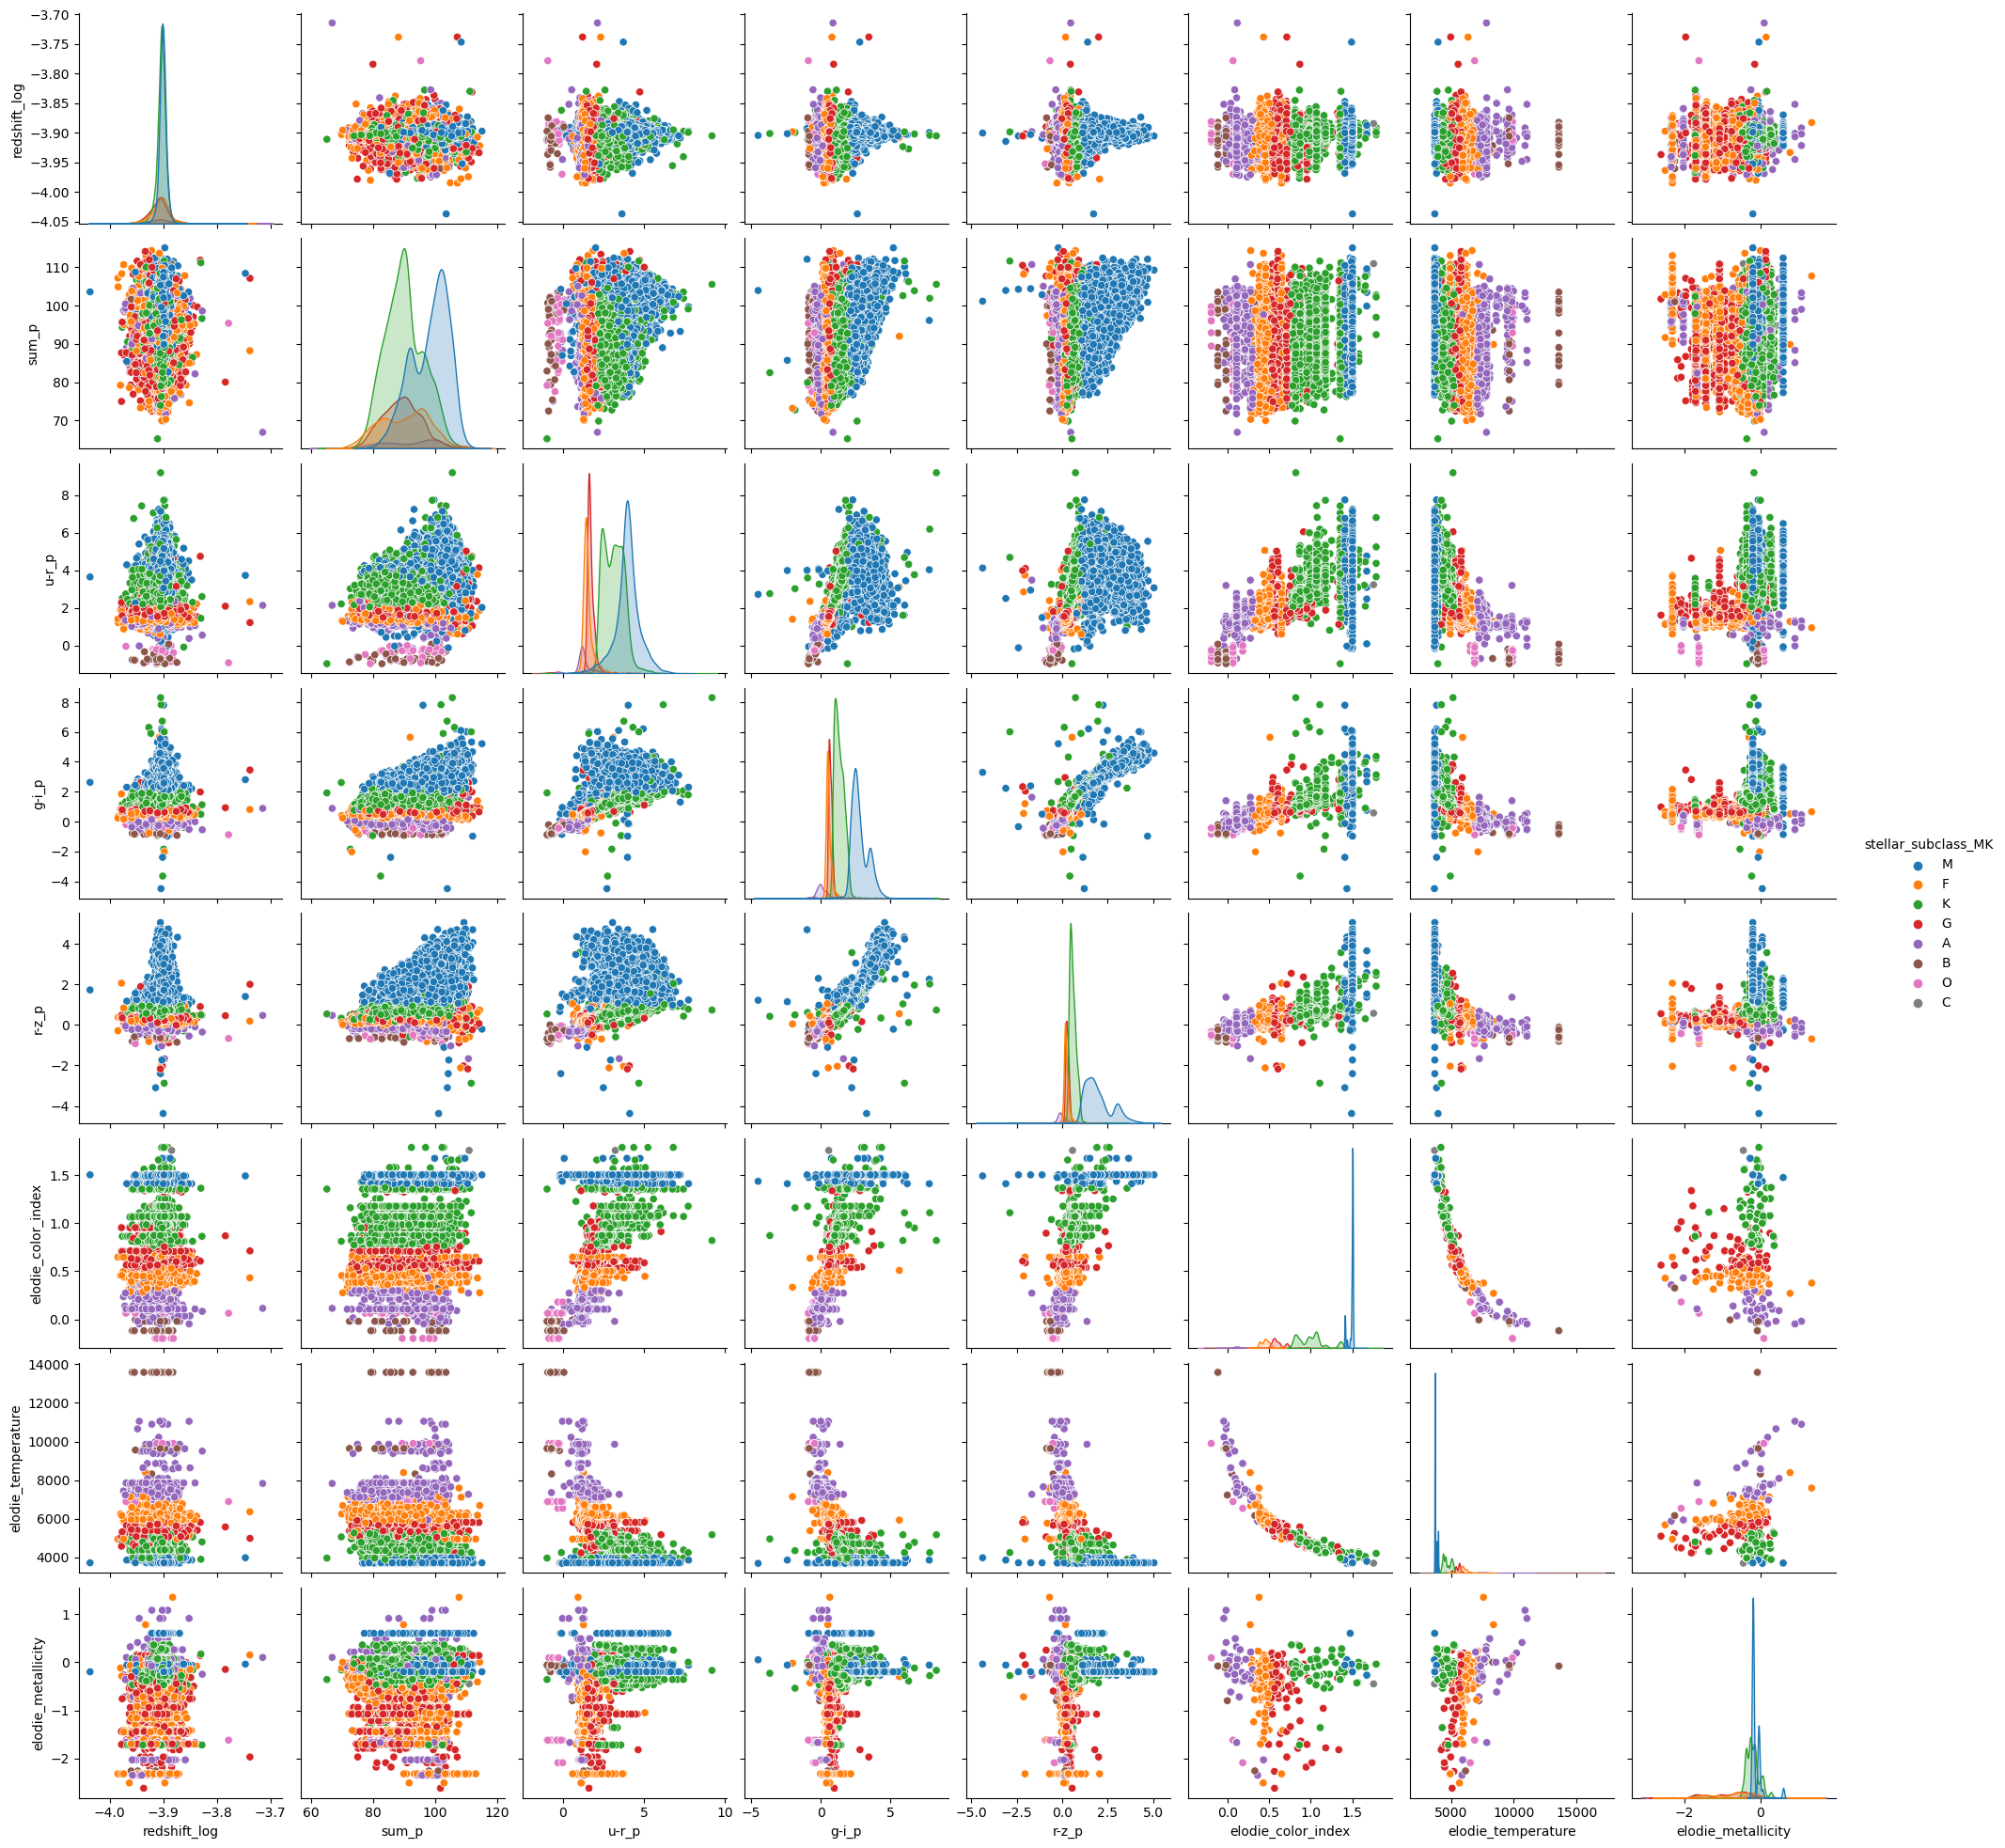

In [20]:
# investigate selected photometric features for stars

# NOTE: these features are selected based on physical (common-sense) reasons and validated based on correlations
features = ['redshift_log', 'sum_p', 'u-r_p', 'g-i_p', 'r-z_p', 'elodie_color_index', 'elodie_temperature', 'elodie_metallicity']

# create a dataframe based on relevant subset of features
df = sdss_primary[['stellar_subclass_MK'] + features]
df = df[df['stellar_subclass_MK'] != 'unclassified']
df = df.sample(frac=0.2)

# generate correlation plot
p_correlations = df[features].corr()
plt.figure(figsize=(8, 8))
sns.heatmap(p_correlations, annot=True, cmap='coolwarm', fmt='.2f')

# generate the pairplot
plt.figure(figsize=(10, 10))
sns.pairplot(df, hue='stellar_subclass_MK')

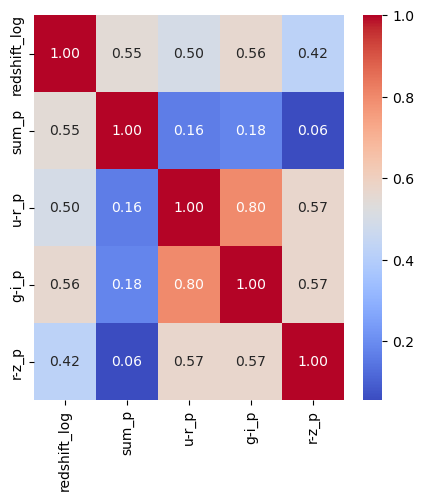

<Figure size 1000x1000 with 0 Axes>

In [28]:
# investigate selected photometric features for galaxies

# NOTE: these features are selected based on physical (common-sense) reasons and validated based on correlations
features = ['redshift_log', 'sum_p', 'u-r_p', 'g-i_p', 'r-z_p']

# create a dataframe based on relevant subset of features
df = sdss_primary[['gz2_subclass_hubble'] + features]
df = df[df['gz2_subclass_hubble'] != 'unclassified']
df = df.sample(frac=0.1)

# generate correlation plot
p_correlations = df[features].corr()
plt.figure(figsize=(5, 5))
sns.heatmap(p_correlations, annot=True, cmap='coolwarm', fmt='.2f')

# generate the pairplot
plt.figure(figsize=(10, 10))
hue_order = ['Er', 'Ee', 'Ec', 'Sa', 'Sb', 'Sc', 'Sd', 'SBa', 'SBb', 'SBc', 'SBd']
sns.pairplot(df, hue='gz2_subclass_hubble', hue_order=hue_order, palette='RdBu')

In [25]:
# clean up sdss_primary for ML

# specify groups of primary columns
object_identifiers = ['dr8objid']
galaxy_identifiers = ['gz2_filenumber']
object_locations = ['ra', 'dec']
class_label_names = ['sdss_clean_class_name', 'stellar_subclass_MK', 'gz2_subclass_hubble']
class_label_codes = ['sdss_clean_class_code', 'stellar_subclass_code', 'gz2_subclass_code']
galaxy_binary_labels = [label for label in sdss_headers if 'flag' in label]
galaxy_filters = ['petroR90_r_log']
object_features = ['redshift_log', 'sum_p', 'u-r_p', 'g-i_p', 'r-z_p']
star_features = ['elodie_color_index', 'elodie_temperature', 'elodie_metallicity']
# consider adding galaxy features:  ratio of petro_radius to petro_brightness

# truncate to primary columns
class_labels = [item for sublist in zip(class_label_names, class_label_codes) for item in sublist] 
sdss_primary = sdss_primary[object_identifiers + galaxy_identifiers + object_locations \
    + class_labels + galaxy_binary_labels \
    + galaxy_filters + object_features + star_features]

# drop rows that are associated with 'unclassified' objects
sdss_primary = sdss_primary[sdss_primary['sdss_clean_class_name'] != 'unclassified']
sdss_primary = sdss_primary.reset_index(drop=True)

In [26]:
# display some data
display(sdss_primary.head(5))
display(sdss_primary.sample(5))

# inspect dataframe
print(f"\n{sdss_primary.shape = }\n")
print(f"\n{sdss_primary.info()}")

dr8objid gz2_filenumber          ra        dec  \
0  1237651252584448100         192933  236.355530  54.820911   
1  1237651252584448112           <NA>  236.342000  54.802830   
2  1237651252584251555          32264  235.891464  55.133472   
3  1237651252584317089          32265  236.063721  55.035847   
4  1237655130907213985           <NA>  236.150100  54.775720   

  sdss_clean_class_name  sdss_clean_class_code stellar_subclass_MK  \
0                galaxy                      0        unclassified   
1                galaxy                      0        unclassified   
2                galaxy                      0        unclassified   
3                galaxy                      0        unclassified   
4                galaxy                      0        unclassified   

   stellar_subclass_code gz2_subclass_hubble  gz2_subclass_code  \
0                      8                 SBc                  5   
1                      8        unclassified                 11   
2                      8                 SBc                  5   
3                      8                  Sc                  9   
4                      8        unclassified                 11   

  gz1_flag_spiral gz1_flag_elliptical gz1_flag_uncertain gz2_flag_smooth  \
0            True               False              False           False   
1           False               False               True             NaN   
2            True               False              False           False   
3           False               False               True           False   
4           False               False               True             NaN   

  gz2_flag_features_or_disk gz2_flag_star_or_artifact gz2_flag_edgeon_yes  \
0                      True                     False               False   
1                       NaN                       NaN                 NaN   
2                      True                     False               False   
3                     False                     False               False   
4                       NaN                       NaN                 NaN   

  gz2_flag_edgeon_no gz2_flag_bar_yes gz2_flag_bar_no gz2_flag_spiral_yes  \
0               True             True           False                True   
1                NaN              NaN             NaN                 NaN   
2               True            False           False                True   
3               True            False           False               False   
4                NaN              NaN             NaN                 NaN   

  gz2_flag_spiral_no gz2_flag_bulge_none1 gz2_flag_bulge_small  \
0              False                False                False   
1                NaN                  NaN                  NaN   
2              False                False                False   
3              False                False                False   
4                NaN                  NaN                  NaN   

  gz2_flag_bulge_medium gz2_flag_bulge_large gz2_flag_odd_yes gz2_flag_odd_no  \
0                 False                False            False           False   
1                   NaN                  NaN              NaN             NaN   
2                 False                False            False           False   
3                 False                False             True           False   
4                   NaN                  NaN              NaN             NaN   

  gz2_flag_round_circular gz2_flag_round_medium gz2_flag_round_cigar  \
0                   False                 False                False   
1                     NaN                   NaN                  NaN   
2                   False                 False                False   
3                   False                  True                False   
4                     NaN                   NaN                  NaN   

  gz2_flag_feature_ring gz2_flag_feature_lens_or_arc  \
0                 False                        Fa

dr8objid gz2_filenumber          ra        dec  \
397311  1237678600219984415           <NA>  332.818600  13.977670   
773992  1237661873477779905           <NA>  186.463510  45.610220   
87904   1237650797288226986         247559  133.560867   0.843905   
29076   1237657630603083937           <NA>  185.553800  53.503390   
239362  1237661976010490132         223417  185.445740   7.806529   

       sdss_clean_class_name  sdss_clean_class_code stellar_subclass_MK  \
397311                galaxy                      0        unclassified   
773992                  star                      2        unclassified   
87904                 galaxy                      0        unclassified   
29076                 galaxy                      0        unclassified   
239362                galaxy                      0        unclassified   

        stellar_subclass_code gz2_subclass_hubble  gz2_subclass_code  \
397311                      8        unclassified                 11   
773992                      8        unclassified                 11   
87904                       8                  Sb                  8   
29076                       8        unclassified                 11   
239362                      8                  Er                  2   

       gz1_flag_spiral gz1_flag_elliptical gz1_flag_uncertain gz2_flag_smooth  \
397311           False               False               True             NaN   
773992             NaN                 NaN                NaN             NaN   
87904            False               False               True           False   
29076             True               False              False             NaN   
239362           False                True              False            True   

       gz2_flag_features_or_disk gz2_flag_star_or_artifact  \
397311                       NaN                       NaN   
773992                       NaN                       NaN   
87904                      False                     False   
29076                        NaN                       NaN   
239362                     False                     False   

       gz2_flag_edgeon_yes gz2_flag_edgeon_no gz2_flag_bar_yes  \
397311                 NaN                NaN              NaN   
773992                 NaN                NaN              NaN   
87904                False               True            False   
29076                  NaN                NaN              NaN   
239362               False              False            False   

       gz2_flag_bar_no gz2_flag_spiral_yes gz2_flag_spiral_no  \
397311             NaN                 NaN                NaN   
773992             NaN                 NaN                NaN   
87904             True               False               True   
29076              NaN                 NaN                NaN   
239362           False               False              False   

       gz2_flag_bulge_none1 gz2_flag_bulge_small gz2_flag_bulge_medium  \
397311                  NaN                  NaN                   NaN   
773992                  NaN                  NaN                   NaN   
87904                 False                False                 False   
29076                   NaN                  NaN                   NaN   
239362                False                False                 False   

       gz2_flag_bulge_large gz2_flag_odd_yes gz2_flag_odd_no  \
397311                  NaN              NaN             NaN   
773992                  NaN              NaN             NaN   
87904                 False            False           False   
29076                   NaN              NaN             NaN   
239362                False            False           False   

       gz2_flag_round_circular gz2_flag_round_medium gz2_flag_round_cigar  \
397311                     NaN                   NaN                  NaN   
773992                     NaN                   NaN                  NaN   
87904      


sdss_primary.shape = (1089273, 59)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1089273 entries, 0 to 1089272
Data columns (total 59 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   dr8objid                      1089273 non-null  string 
 1   gz2_filenumber                222372 non-null   string 
 2   ra                            1089273 non-null  float64
 3   dec                           1089273 non-null  float64
 4   sdss_clean_class_name         1089273 non-null  object 
 5   sdss_clean_class_code         1089273 non-null  int64  
 6   stellar_subclass_MK           1089273 non-null  object 
 7   stellar_subclass_code         1089273 non-null  int64  
 8   gz2_subclass_hubble           1089273 non-null  object 
 9   gz2_subclass_code             1089273 non-null  int64  
 10  gz1_flag_spiral               531099 non-null   object 
 11  gz1_flag_elliptical           531099 non-null   obje

In [27]:
# save the primary processed data to a file

sdss_primary.to_csv('../data/processed/sdss_primary.csv.gz', compression='gzip', index=False)